# Story: DataByteSun: RefreshCo's Path to Success

____________

# Introduction
**DataByteSun** had made its mark as a leading **technology consultancy**, known for its expertise in leveraging data to drive impactful digital strategies for businesses. Their long-standing **client, RefreshCo**—a popular beverage brand—faced a new challenge. Despite substantial advertising investments, their sales had reached a particular level and now the sales are not growing. Saira, the CEO of RefreshCo, turned to DataByteSun for an innovative, data-driven approach to reignite their marketing effectiveness and inspire growth.

# The Challenge
Saira was particularly concerned about their TV advertising efforts. She believed that TV ads played a crucial role in driving sales but lacked the necessary data to substantiate this belief. 

<span style="font-family: 'Courier New'; font-size: 18px;">=> To address this issue, Saira engaged DataByteSun to analyze the impact of their advertising budget, specifically focusing on the relationship between television advertising and sales performance. </span>


<span style="font-family: 'Courier New'; font-size: 22px;"> Dataset: Advertising Sales Dataset </span><br>
<span style="font-family: 'Courier New'; font-size: 14px;"> Link: https://www.kaggle.com/datasets/ashydv/advertising-dataset </span>

_________________________
_________________________

# The Investigation
As a data analyst at DataByteSun, you took on the challenge.You gathered the historical advertising data for RefreshCo, which included expenditures on TV, radio, and newspapers, along with the corresponding sales figures. 
- The dataset consisted of the following columns:
    - TV: Amount spent on TV advertising (Budget for TV Advertisements in 1000 dollers)
    - Radio: Amount spent on radio advertising (Budget for Radio Advertisements in 1000 dollers)
    - Newspaper: Amount spent on newspaper advertising (Budget for Newspaper Advertisements in 1000 dollers)
    - Sales: Total sales generated (Sales Revenue in Million dollers)

____________________
____________________

## - EDA

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# Import datasets
import pandas as pd
import numpy as np

data = pd.read_csv('../Datasets/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# Initial Data Exploration
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<span style="font-family: 'Courier New'; font-size: 18px;">Based on the results, there are total of 200 records. Notably, the budget for TV is significantly higher compared to the other media. Additionally, you observed that the minimum value for Radio is 0, which warrants further investigation. </span>

In [4]:
print(data[data['Radio'] == 0])

       TV  Radio  Newspaper  Sales
127  80.2    0.0        9.2   11.9


<span style="font-family: 'Courier New'; font-size: 18px;">Since there is only one record with a value of 0, you safely ignore it and do not need to pre-process this further. </span>

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
data = data.drop_duplicates()
data.shape

(200, 4)

<span style="font-family: 'Courier New'; font-size: 18px;">There are no duplicate records in the dataset, as the count remains at 200 even after attempting to drop duplicates. </span>



_________________________

## - Visualization
<span style="font-family: 'Courier New'; font-size: 18px;">As you proceed, you started to visualize the relationships within the dataset. </span>

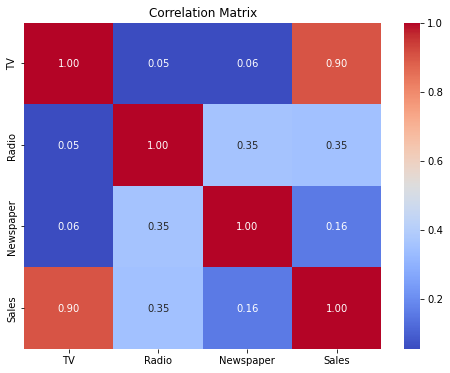

In [8]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 1**: There is a positive correlation between TV advertising and sales, while radio and newspaper spending showed weaker correlations. (Independence) </span>

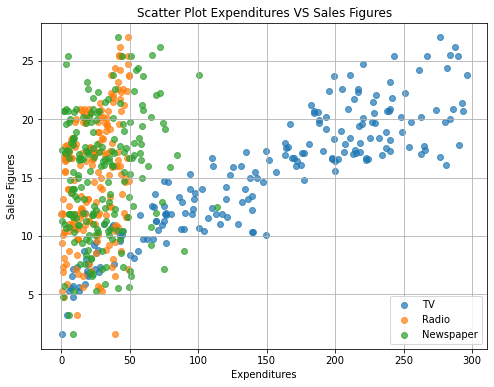

In [9]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Plot each column on the x-axis
plt.scatter(data['TV'], data['Sales'], label='TV', alpha=0.7)
plt.scatter(data['Radio'], data['Sales'], label='Radio', alpha=0.7)
plt.scatter(data['Newspaper'], data['Sales'], label='Newspaper', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot Expenditures VS Sales Figures')
plt.xlabel('Expenditures')
plt.ylabel('Sales Figures')
plt.legend()
plt.grid(True)
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 2**: You plotted advertising expenditure against sales. The scatter plot revealed a clear upward trend for TV, indicating that increased spending on TV ads correlated with higher sales revenue. (Linearity) </span>

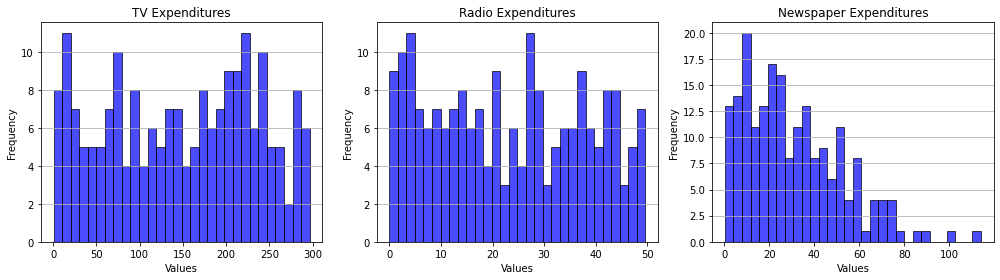

In [10]:
# Histogram
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(14,4))

for i, column in enumerate(columns_to_plot,1):
    plt.subplot(1,3,i)
    plt.hist(data[column], bins=30, alpha=0.7,color = 'blue', edgecolor='black')
    plt.title(f"{column} Expenditures")
    plt.xlabel('Values')
    plt.ylabel("Frequency")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

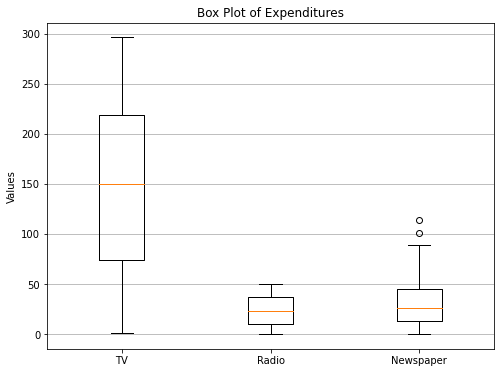

In [11]:
# Boxplot 
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(8,6))

plt.boxplot([data[column] for column in columns_to_plot], labels=columns_to_plot)

plt.title('Box Plot of Expenditures')
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">The above results indicate that their might be presence of outliers in the Newspaper column. However, since our primary focus is on the relationship between TV and Sales, You can set aside this issue for now. </span><br>

<span style="font-family: 'Courier New'; font-size: 18px;">Based on this observations, you conclude that there is a linear relationship between the budget for TV advertisements and sales revenue. Additionally, all observations are independent, there is no multicollinearity, and the data for TV advertisements is normally distributed. </span>

_________________________

## - Linear Regression
<span style="font-family: 'Courier New'; font-size: 18px;">Since data meets most of the necessary conditions for linear regression, You and team can proceed confidently with the analysis. </span>

### - Performing Simple Linear Regression

In [12]:
# Linear Regression over training Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data[['TV']]
y = data[['Sales']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

model = LinearRegression()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)

In [13]:
mse = mean_squared_error(y_train,y_train_pred)
r2 = r2_score(y_train,y_train_pred)

In [14]:
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for TV: {model.coef_[0]}')

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Intercept: [7.00710843]
Coefficient for TV: [0.05548294]
Mean Squared Error: 4.998442356450173
R^2 Score: 0.8134866044709264


### - Model Interpretation
<div class="alert alert-block alert-info">
<b><span style="font-family: 'Courier New'; font-size: 20px;">The Interpretation comes out as : Sales=7.007+0.055×TV</b> </span>
</div> 


<div class="alert alert-block alert-light">
    <b>
        <span style="font-family: 'Arial'; font-size: 17px;">
            Which means:
        </span>
    </b>
    <ul style="font-family: 'Arial'; font-size: 20px;">
        <li>If no budget is allocated to TV ads, sales are projected to be approximately &dollar;7M.</li>
        <li>For each &dollar;1,000 increase in the TV budget, sales increase by about 55,482.94 dollers.</li>
    </ul>
</div>


### - Actual Vs Predicted Sales visualization
#### Over a training dataset

In [16]:
# Ensure x_train, y_train, x_test, y_test, and y_pred are flattened arrays for plotting
x_train_flat = x_train.values.flatten() if isinstance(x_train, pd.DataFrame) else x_train
y_train_flat = y_train.values.flatten() if isinstance(y_train, pd.DataFrame) else y_train
x_test_flat = x_test.values.flatten() if isinstance(x_test, pd.DataFrame) else x_test
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test
y_train_pred_flat = y_train_pred.flatten()

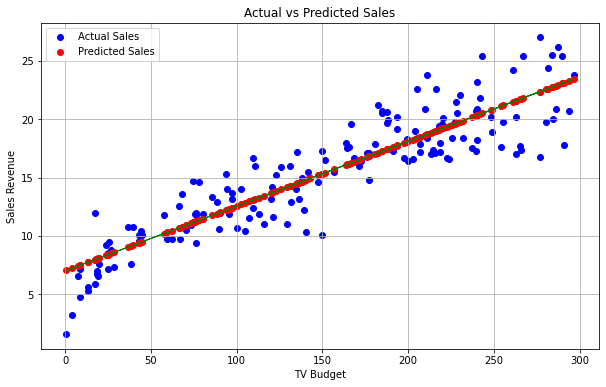

In [17]:
# Plot the results 
plt.figure(figsize=(10, 6))
plt.scatter(x_train_flat, y_train_flat, color='blue', label='Actual Sales')
plt.scatter(x_train_flat, y_train_pred_flat, color='red', label='Predicted Sales')
plt.plot(x_train_flat, y_train_pred_flat, color='green', linewidth=1)
plt.title('Actual vs Predicted Sales')
plt.xlabel("TV Budget")
plt.ylabel("Sales Revenue")
plt.legend()
plt.grid()
plt.show()

## - Residual Analysis

In [18]:
# Calculate residuals
res = np.array(y_train_flat - y_train_pred_flat, dtype=float)

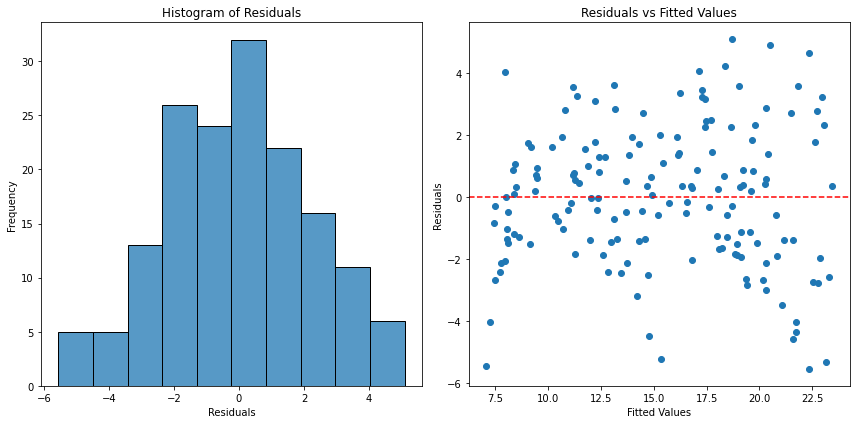

In [19]:
# Create a figure for residuals
plt.figure(figsize=(12, 6))

# Plot the histogram of residuals without KDE first
plt.subplot(1, 2, 1)
sns.histplot(res, bins=10)  # Try without KDE to isolate the issue
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Residuals vs Fitted values plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_flat, res)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 3**: The center of the normal distribution is around zero. The shape is also looks like a normal distribution. (Normality) </span>

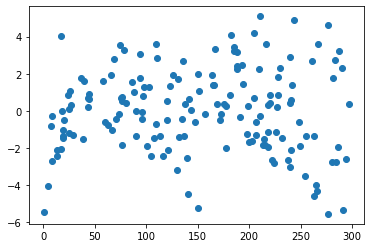

In [20]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(x_train, res)
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 4**: The residuals don't follow any patterns. So, the asssumptions of Simple Linear Regression are validated. (Homoscedasticity) </span>

### - Actual Vs Predicted Sales visualization
#### Over a testing dataset

In [21]:
y_pred = model.predict(x_test)
y_pred_flat = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred

In [22]:
# evaluate the model on the training and test set
print('The R-squared for the training set is', round(r2_score(y_true = y_train, y_pred = y_train_pred), 2))
print('The R-squared for the test set is', round(r2_score(y_true = y_test, y_pred = y_pred), 2))

The R-squared for the training set is 0.81
The R-squared for the test set is 0.8


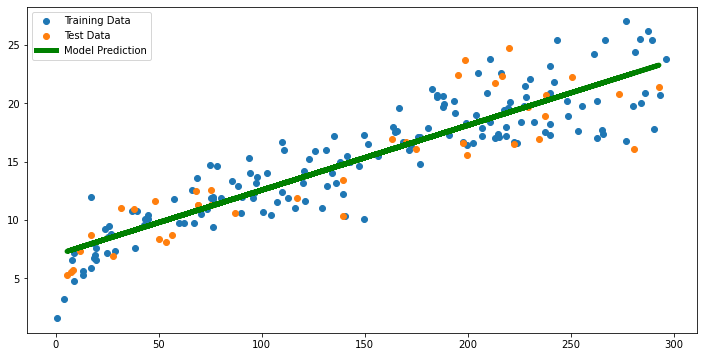

In [23]:
# Plot the training and test data along with the model's predictions
plt.figure(figsize=(12, 6))
plt.scatter(x_train_flat, y_train_flat, label='Training Data')
plt.scatter(x_test_flat, y_test_flat, label='Test Data')
plt.plot(x_test_flat, y_pred_flat, color='g', label='Model Prediction', linewidth=5)
plt.legend()
plt.show()


________________
_________________________

# Recommendations
<span style="font-family: 'Arial'; font-size: 20px;"> Based on our comprehensive analysis, DataByteSun recommended that RefreshCo increase its television advertising budget. We provided Saira with substantial data to support this recommendation, demonstrating a clear link between TV advertising and sales growth </span>

__________________
_________________________

# Conclusion
<span style="font-family: 'Arial'; font-size: 18px;"> With data-driven insights in hand, Saira and her team felt empowered to adjust their advertising strategy. Following the implementation of your recommendations, RefreshCo experienced a significant uptick in sales over the following months. The partnership with DataByteSun flourished, leading to further successful collaborations in the competitive beverage market. </span>


<div class="alert alert-block alert-success">
<b>END</b>
</div>